In [1]:
from dataset import MosquitoDataset
from model import build_model
from train import train

import torch
from torch.utils.data import DataLoader
import os

from utils import plot_predictions, get_metrics, plot_losses

# Simple Dataset

In [2]:
datafolder = "simple_dataset"
batch_size = 4
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train")
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val")
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test")


trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [3]:
model = build_model(num_classes=7)  # 6 classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [4]:
N_epochs = 5
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 1593/1593 [19:38<00:00,  1.35it/s]


Epoch [1/5] | Train Loss: 0.1776 | Val Loss: 0.1563 | Time: 22 min 9 s
Best model saved with val loss: 0.1563


100%|██████████| 1593/1593 [19:21<00:00,  1.37it/s]


Epoch [2/5] | Train Loss: 0.1428 | Val Loss: 0.1339 | Time: 21 min 46 s
Best model saved with val loss: 0.1339


100%|██████████| 1593/1593 [18:59<00:00,  1.40it/s]


Epoch [3/5] | Train Loss: 0.1253 | Val Loss: 0.1206 | Time: 21 min 26 s
Best model saved with val loss: 0.1206


100%|██████████| 1593/1593 [17:53<00:00,  1.48it/s]


Epoch [4/5] | Train Loss: 0.1065 | Val Loss: 0.1153 | Time: 19 min 59 s
Best model saved with val loss: 0.1153


100%|██████████| 1593/1593 [15:30<00:00,  1.71it/s]


Epoch [5/5] | Train Loss: 0.1020 | Val Loss: 0.1171 | Time: 17 min 39 s


Loss plot saved to plots/simple_dataset/


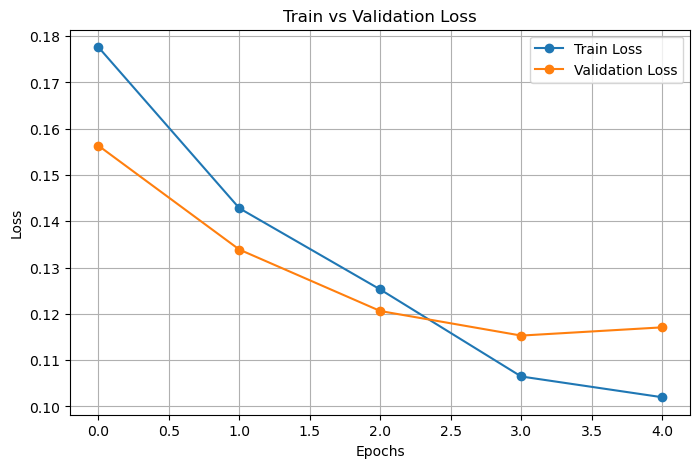

In [5]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)

In [6]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_58708\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

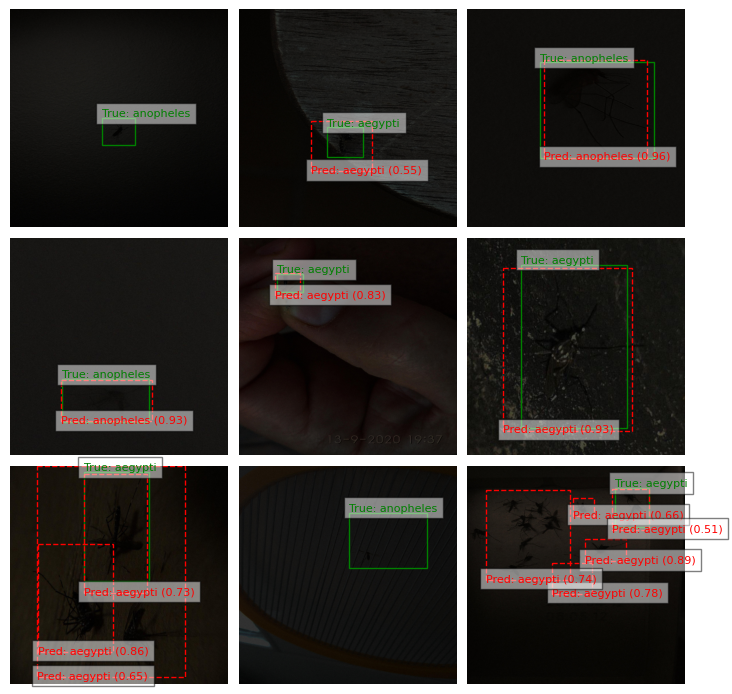

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=False, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=None)


In [68]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 132/132 [00:52<00:00,  2.49it/s]

F1 Score: 0.8205, mAP: 0.8226, Composite mAP-F1: 0.8215, Precision: 0.7396, Recall: 0.9212


# Iluminated dataset

In [3]:
datafolder = "il_dataset"
batch_size = 4
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train")
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val")
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test")


trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [4]:
model = build_model(num_classes=7)  # 6 classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [5]:
N_epochs = 5
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 1593/1593 [15:45<00:00,  1.69it/s]


Epoch [1/5] | Train Loss: 0.1826 | Val Loss: 0.1603 | Time: 17 min 48 s
Best model saved with val loss: 0.1603


100%|██████████| 1593/1593 [17:02<00:00,  1.56it/s]


Epoch [2/5] | Train Loss: 0.1501 | Val Loss: 0.1499 | Time: 19 min 23 s
Best model saved with val loss: 0.1499


100%|██████████| 1593/1593 [16:02<00:00,  1.65it/s]


Epoch [3/5] | Train Loss: 0.1320 | Val Loss: 0.1300 | Time: 17 min 50 s
Best model saved with val loss: 0.1300


100%|██████████| 1593/1593 [16:15<00:00,  1.63it/s]


Epoch [4/5] | Train Loss: 0.1109 | Val Loss: 0.1231 | Time: 18 min 36 s
Best model saved with val loss: 0.1231


100%|██████████| 1593/1593 [16:07<00:00,  1.65it/s]


Epoch [5/5] | Train Loss: 0.1075 | Val Loss: 0.1208 | Time: 18 min 0 s
Best model saved with val loss: 0.1208


Loss plot saved to plots/il_dataset/


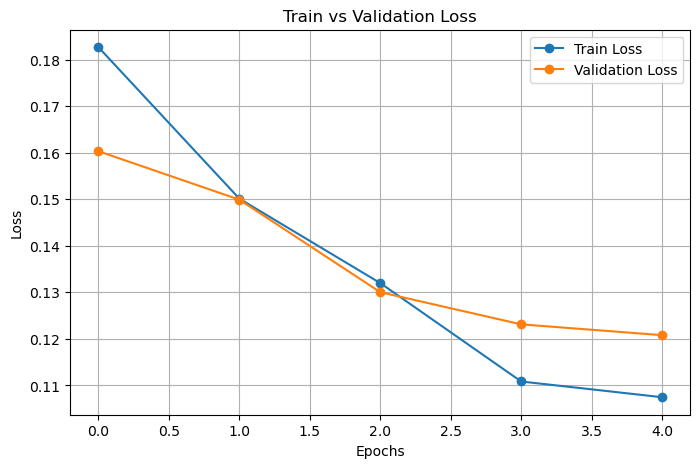

In [ ]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)


In [13]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_54384\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

Plot saved at: plots/il_dataset/predictions_vs_ground_truth.png


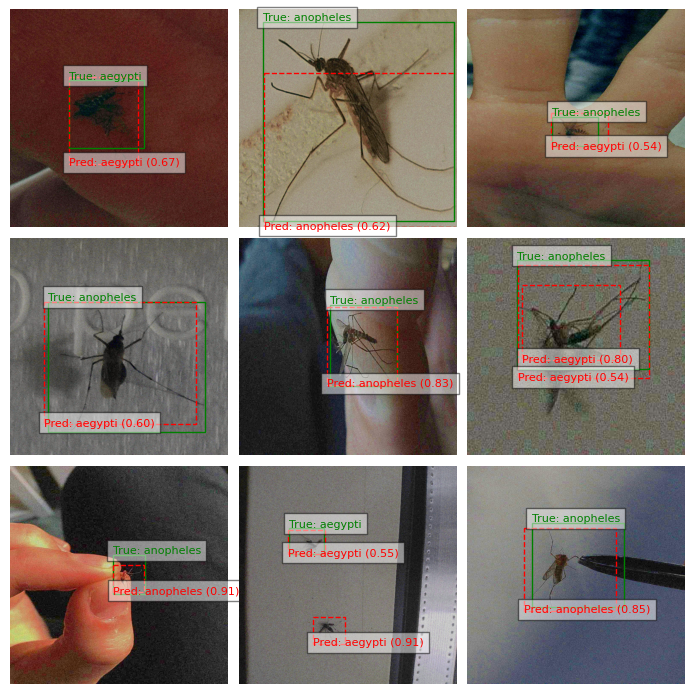

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)

In [16]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 132/132 [00:48<00:00,  2.71it/s]

F1 Score: 0.7878, mAP: 0.8138, Composite mAP-F1: 0.8008, Precision: 0.7070, Recall: 0.8894
